### Вопрос/проблема:

Определить проблемные зоны, связанные с доставкой товара до конечного пользователя. Предложить возможные решения.


### Обзор

Набор данных основан на цепочке поставок продуктов для макияжа

**Данные:**
* **Product Type** - тип продукта
* **SKU** - единица учета
* **Price** - цена
* **Availability** - доступность товара
* **Number of products sold** - кол-во проданных товаров
* **Revenue generated** - полученный доход
* **Customer demographics** - пол покупателя
* **Stock levels** - запас
* **Lead times** - время выполнения заказа
* **Order quantities** - кол-во заказов
* **Shipping times** - время доставки
* **Shipping carriers** - курьер
* **Shipping costs** - стоимость доставки
* **Supplier name** - наименование поставщика
* **Location** - пункт назначения
* **Lead time** - время выполнения
* **Production volumes** - объем производства
* **Manufacturing lead time** - срок изготовления
* **Manufacturing costs** - стоимость изготовления
* **Defect rates** - уровень брака
* **Transportation modes** - тип перевозки
* **Routes** - маршрут
* **Costs** - стоимость
<br>

* **Inspection results** - результат доставки. Используем как целевую, поскольку она в себе содержит значения статусов досатвки (доставлено, в процессе, отказ). Будем оценивать влияние различных факторов (независимых переменных) на целевую, чтобы увидеть, что именно влияет на результат доставки и как его улучшить.

### Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Загружаем данные

In [2]:
path = r'D:\Литература\Кругозор\Хороший программист\Datasets\supply_chain_data.xlsx'

In [3]:
df = pd.read_excel(path)

### Исследовательский анализ данных

In [4]:
# информация по датасету
# df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             300 non-null    object 
 1   SKU                      300 non-null    object 
 2   Price                    300 non-null    float64
 3   Availability             300 non-null    int64  
 4   Number of products sold  300 non-null    int64  
 5   Revenue generated        300 non-null    float64
 6   Customer demographics    300 non-null    object 
 7   Stock levels             300 non-null    int64  
 8   Lead times               300 non-null    int64  
 9   Order quantities         300 non-null    int64  
 10  Shipping times           300 non-null    int64  
 11  Shipping carriers        300 non-null    object 
 12  Shipping costs           300 non-null    float64
 13  Supplier name            300 non-null    object 
 14  Location                 3

In [5]:
# размер датасета
df.shape

(300, 24)

In [6]:
# проверим на дубликаты
df.duplicated().sum()

0

In [7]:
# проверим на пропуски
df.isna().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [8]:
# посмотрим на данные
df.head()

Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29                 215   
1                37  ...    Mumbai        23                 517   
2                88  ...    Mumbai        12                 971   
3                59  ...   Kolkata        24                 937   
4                56  ...     Delhi         5                 414   

  Manufacturing lead time Manufacturing costs  Inspection results  \
0                      29           46.279879             Pending   
1                      30           33.616769             Pending   
2                      27           30.688019             Pending   
3                      18           35.624741                Fail   
4                       3           92.065161                Fail   

   Defect rates  Transportation modes   Routes       Costs  
0      0.226410                  Road  Route B  187.752075  
1      4.854068                  Road  Route B  503.065579  
2      4.580593                   Air  Route C  141.920282  
3      4.746649                  Rail  Route A  254.776159  
4      3.145580                   Air  Route A  923.440632  

[5 rows x 24 columns]

In [9]:
# заменим ' ' в названиях колонок на _
df = df.rename(columns=lambda x: x.replace(' ', '_'))
df.head(3)

Product_type   SKU      Price  Availability  Number_of_products_sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   

   Revenue_generated Customer_demographics  Stock_levels  Lead_times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   

   Order_quantities  ...  Location Lead_time  Production_volumes  \
0                96  ...    Mumbai        29                 215   
1                37  ...    Mumbai        23                 517   
2                88  ...    Mumbai        12                 971   

  Manufacturing_lead_time Manufacturing_costs  Inspection_results  \
0                      29           46.279879             Pending   
1                      30           33.616769             Pending   
2                      27           30.688019             Pending   

   Defect_rates  Transportation_modes   Routes       Costs  
0      0.226410                  Road  Route B  187.752075  
1      4.854068                  Road  Route B  503.065579  
2      4.580593                   Air  Route C  141.920282  

[3 rows x 24 columns]

In [10]:
# посмотрим на колонки в которых хранятся строки
df_obj = df.select_dtypes(include='object')
df_obj.head()

Product_type   SKU Customer_demographics Shipping_carriers Supplier_name  \
0     haircare  SKU0            Non-binary         Carrier B    Supplier 3   
1     skincare  SKU1                Female         Carrier A    Supplier 3   
2     haircare  SKU2               Unknown         Carrier B    Supplier 1   
3     skincare  SKU3            Non-binary         Carrier C    Supplier 5   
4     skincare  SKU4            Non-binary         Carrier A    Supplier 1   

  Location Inspection_results Transportation_modes   Routes  
0   Mumbai            Pending                 Road  Route B  
1   Mumbai            Pending                 Road  Route B  
2   Mumbai            Pending                  Air  Route C  
3  Kolkata               Fail                 Rail  Route A  
4    Delhi               Fail                  Air  Route A

In [11]:
# удалим из набора данных колонку SKU
df_obj = df_obj.loc[:, ~df_obj.columns.isin(['SKU'])]

In [12]:
col_name = df_obj.columns.to_list()

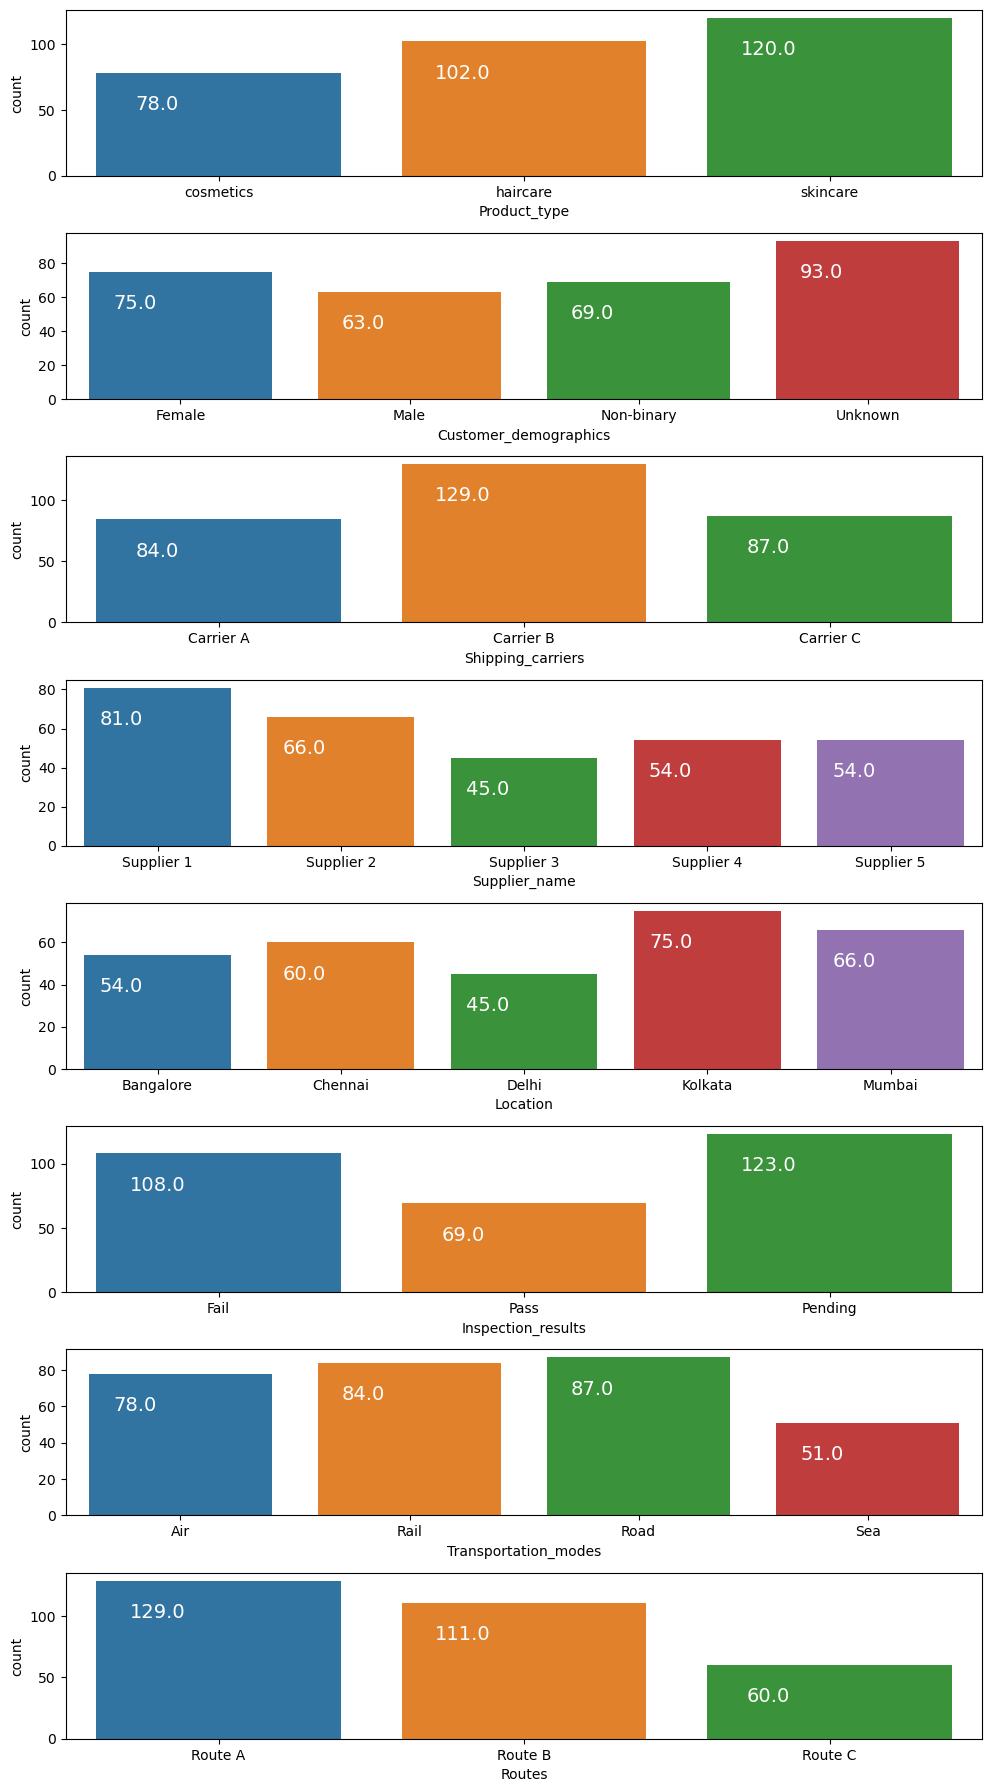

In [13]:
fig, axes = plt.subplots(nrows=len(col_name), ncols=1, figsize=(10, 18))
for i in range(len(col_name)):
    sort_val = pd.Series(df_obj[col_name[i]].unique()).sort_values().to_list()
    ax = sns.countplot(data=df_obj, x=df_obj.iloc[:, i], ax=axes[i], order=sort_val)
    plt.tight_layout(pad=1.0)
    plt.xlabel(f'{col_name[i]}')
        
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', xy=(p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=14)

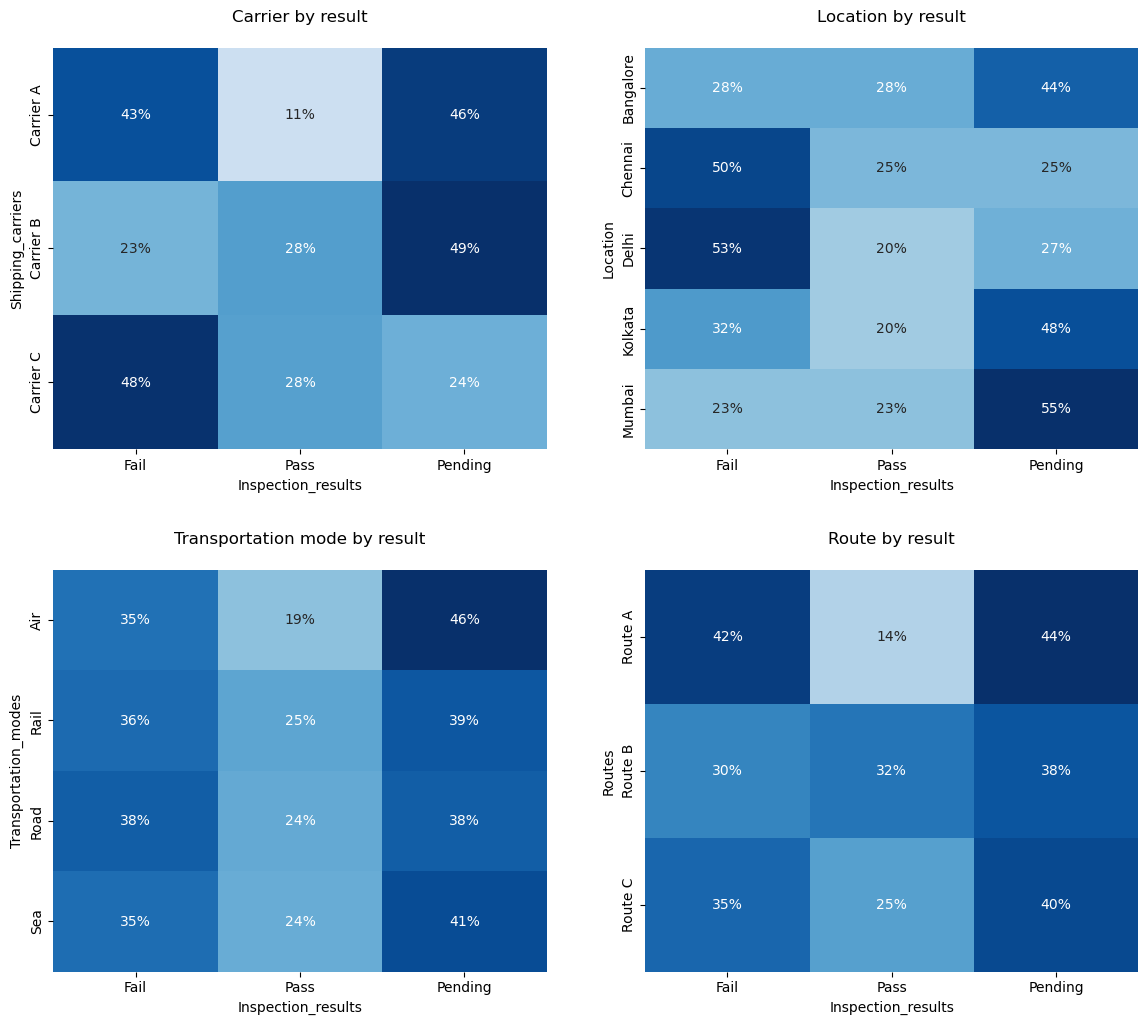

In [14]:
# оценим влияние различных факторов на целевую переменную inspection_results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
sns.heatmap(pd.crosstab(df_obj['Shipping_carriers'], df_obj['Inspection_results'], normalize='index'), cmap='Blues', annot=True, ax=axes[0,0], cbar=False, fmt='.0%', vmin=0)
sns.heatmap(pd.crosstab(df_obj['Location'], df_obj['Inspection_results'], normalize='index'), cmap='Blues', annot=True, ax=axes[0,1], cbar=False, fmt='.0%', vmin=0)
sns.heatmap(pd.crosstab(df_obj['Transportation_modes'], df_obj['Inspection_results'], normalize='index'), cmap='Blues', annot=True, ax=axes[1,0], cbar=False, fmt='.0%', vmin=0)
sns.heatmap(pd.crosstab(df_obj['Routes'], df_obj['Inspection_results'], normalize='index'), cmap='Blues', annot=True, ax=axes[1,1], cbar=False, fmt='.0%', vmin=0)

axes[0][0].set_title('Carrier by result\n')
axes[0][1].set_title('Location by result\n')
axes[1][0].set_title('Transportation mode by result\n')
axes[1][1].set_title('Route by result\n')

plt.subplots_adjust(hspace=0.3);

Вывод:
- Доля удачных доставок больше всего у курьера C и В, неудачных меньше у курьера С.
- Доля удачных доставок больше всего в Bangalore, неудачных - в Deli.
- Доля удачных доставок по типу перевозки больше по ж/д, неудачных - по трассе.
- Доля удачных доставок выше по маршруту В, неудачных - по маршруту А.

In [15]:
# закодируем значение Fail как 0, Pass как 1
# поскольку мы не знаем статус для Pending, заменим его на математическое ожидание вероятности успешной доставки
# основываясь на исторических данных
pending = np.divide(df_obj.query('Inspection_results == "Pass"').Inspection_results.count(), 
                    df_obj.query('Inspection_results == "Pending"').Inspection_results.count()).round(1)
pending

0.6

In [16]:
# закодируем целевую переменную Inspection_results 
df['Code_results'] = np.where(df.Inspection_results == 'Fail', 0,
                     np.where(df.Inspection_results == 'Pass', 1, pending))
df[['Inspection_results', 'Code_results']].tail(10)

Inspection_results  Code_results
290               Pass           1.0
291            Pending           0.6
292               Pass           1.0
293               Fail           0.0
294               Pass           1.0
295            Pending           0.6
296            Pending           0.6
297               Fail           0.0
298            Pending           0.6
299               Fail           0.0

In [17]:
# посмотрим на колонки в которых хранятся числа
df_num = df.select_dtypes(exclude='object')
df_num.head()

Price  Availability  Number_of_products_sold  Revenue_generated  \
0  69.808006            55                      802        8661.996792   
1  14.843523            95                      736        7460.900065   
2  11.319683            34                        8        9577.749626   
3  61.163343            68                       83        7766.836426   
4   4.805496            26                      871        2686.505152   

   Stock_levels  Lead_times  Order_quantities  Shipping_times  Shipping_costs  \
0            58           7                96               4        2.956572   
1            53          30                37               2        9.716575   
2             1          10                88               2        8.054479   
3            23          13                59               6        1.729569   
4             5           3                56               8        3.890548   

   Lead_time  Production_volumes  Manufacturing_lead_time  \
0         29                 215                       29   
1         23                 517                       30   
2         12                 971                       27   
3         24                 937                       18   
4          5                 414                        3   

   Manufacturing_costs  Defect_rates       Costs  Code_results  
0            46.279879      0.226410  187.752075           0.6  
1            33.616769      4.854068  503.065579           0.6  
2            30.688019      4.580593  141.920282           0.6  
3            35.624741      4.746649  254.776159           0.0  
4            92.065161      3.145580  923.440632           0.0

In [18]:
# посмотрим на описательные статистики
df.describe()

Price  Availability  Number_of_products_sold  Revenue_generated  \
count  300.000000    300.000000               300.000000         300.000000   
mean    49.462461     48.400000               461.006667        5776.048187   
std     31.428586     30.640324               306.089566        2773.280824   
min      1.529978      1.000000                 7.000000         955.456671   
25%     18.850417     22.750000               183.500000        2862.393271   
50%     51.353560     43.500000               399.500000        6080.673632   
75%     76.266056     75.000000               703.250000        8187.000332   
max    109.088462    100.000000              1096.000000       10853.112004   

       Stock_levels  Lead_times  Order_quantities  Shipping_times  \
count    300.000000  300.000000        300.000000      300.000000   
mean      47.816667   16.000000         49.256667        5.776667   
std       31.586316    8.892145         27.119532        2.781951   
min        0.000000    1.000000          1.000000        1.000000   
25%       17.000000    8.750000         25.750000        3.750000   
50%       48.000000   16.000000         52.000000        6.000000   
75%       73.000000   23.250000         71.250000        8.000000   
max      110.000000   33.000000        106.000000       11.000000   

       Shipping_costs   Lead_time  Production_volumes  \
count      300.000000  300.000000          300.000000   
mean         5.548149   17.110000          567.863333   
std          2.689837    8.965816          267.109859   
min          0.912138    1.000000           94.000000   
25%          3.384705   10.000000          337.750000   
50%          5.439459   18.000000          568.500000   
75%          7.767465   25.000000          800.750000   
max         10.922798   33.000000         1084.000000   

       Manufacturing_lead_time  Manufacturing_costs  Defect_rates  \
count               300.000000           300.000000    300.000000   
mean                 14.796667            47.266693      2.277158   
std                   8.990258            29.238553      1.473137   
min                   1.000000             0.976562      0.016747   
25%                   7.000000            22.983299      1.045426   
50%                  14.000000            44.764676      2.180926   
75%                  23.000000            69.881078      3.451082   
max                  33.000000           109.412719      5.433181   

             Costs  Code_results  
count   300.000000    300.000000  
mean    529.245782      0.476000  
std     261.894806      0.389267  
min      93.524623      0.000000  
25%     304.142415      0.000000  
50%     527.423559      0.600000  
75%     752.454789      0.600000  
max    1097.154795      1.000000

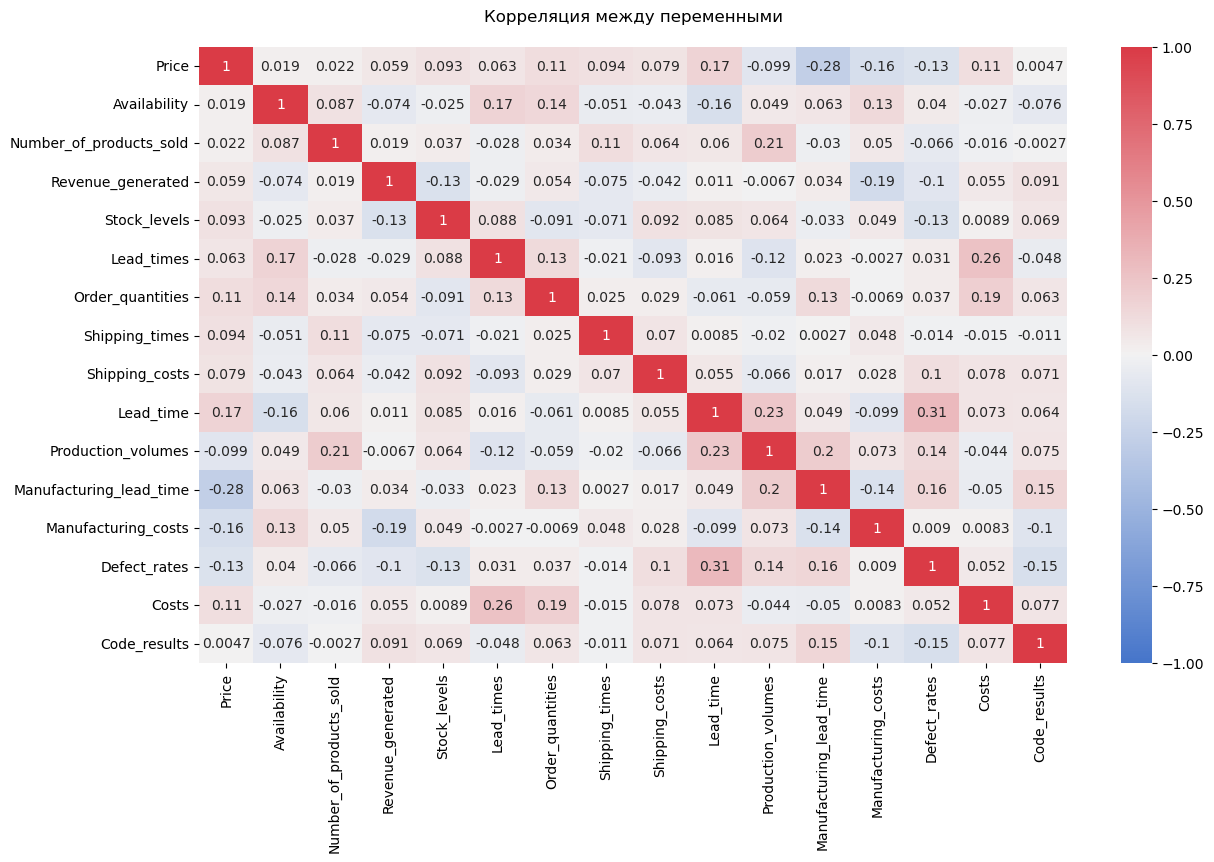

In [19]:
# посмотрим на корреляцию между числовыми переменными и целевой переменной Code_results
plt.figure(figsize=(14, 8))
cmap=sns.diverging_palette(255, 10, as_cmap=True)
sns.heatmap(df_num.corr(), annot=True, cmap=cmap, vmin=-1, vmax=1)
plt.title('Корреляция между переменными\n');

In [20]:
# получим список независимых переменных, исключив зависимую переменную Code_results
dependent_variables = df_num.loc[:, ~df_num.columns.isin(['Code_results'])].columns.to_list()

In [21]:
# вычислим корреляцию с зависимой переменной и запишем результат в датафрейм
dct_cor = {}
for i in dependent_variables:
    dct_cor[f'{i}_CR'] = df_num.Code_results.corr(df_num[i])
dct_cor

{'Price_CR': 0.004718798588531529,
 'Availability_CR': -0.07574329382378957,
 'Number_of_products_sold_CR': -0.0027045374633805725,
 'Revenue_generated_CR': 0.09115277268235776,
 'Stock_levels_CR': 0.06935662183695449,
 'Lead_times_CR': -0.048117563102394977,
 'Order_quantities_CR': 0.0630286753954241,
 'Shipping_times_CR': -0.011451727247742571,
 'Shipping_costs_CR': 0.07148956777294954,
 'Lead_time_CR': 0.06390939756651491,
 'Production_volumes_CR': 0.07453129232558826,
 'Manufacturing_lead_time_CR': 0.15389751802442458,
 'Manufacturing_costs_CR': -0.10362720343450202,
 'Defect_rates_CR': -0.14873989926792658,
 'Costs_CR': 0.0774277979874891}

In [22]:
# получим топ_3 корреляций по абсолютным значениям
df_cor = pd.DataFrame(dct_cor.items(), columns=['name', 'correlation'])\
            .sort_values('correlation', key=abs, ascending=False)\
            .head(3)
df_cor

name  correlation
11  Manufacturing_lead_time_CR     0.153898
13             Defect_rates_CR    -0.148740
12      Manufacturing_costs_CR    -0.103627

Поскольку сильной корреляции между переменными не наблюдается, смотрим на то, что есть.

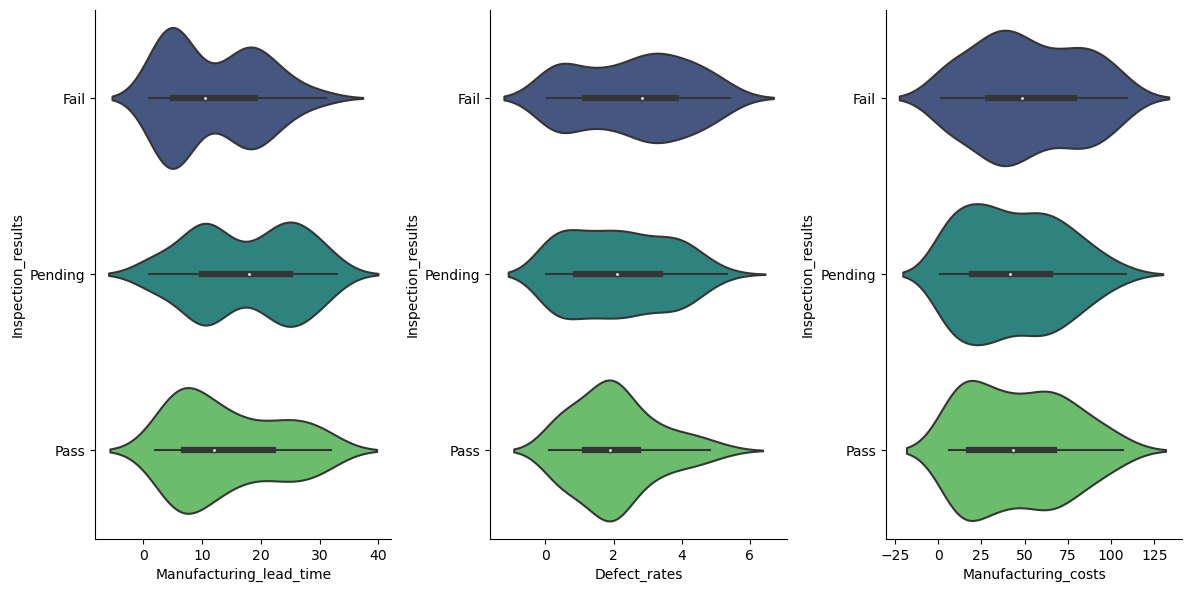

In [23]:
# посмотрим на распределение независимымых переменных из топ_3 по уровням зависимой переменной
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
sns.violinplot(data=df, x=df['Manufacturing_lead_time'], y=df['Inspection_results'],
               order=['Fail', 'Pending', 'Pass'], palette='viridis', ax=axes[0])
sns.violinplot(data=df, x=df['Defect_rates'], y=df['Inspection_results'],
               order=['Fail', 'Pending', 'Pass'], palette='viridis', ax=axes[1])
sns.violinplot(data=df, x=df['Manufacturing_costs'], y=df['Inspection_results'],
               order=['Fail', 'Pending', 'Pass'], palette='viridis', ax=axes[2])

fig.tight_layout(pad=1.0)
sns.despine()

Вывод:
- Наблюдаем положительную корреляцию срока изготовления с результатом доствки. Можно предположить, что чем дольше продукт изготавливается, тем более сложные процессы задействованы, более тщательный контроль качества, что, в свою очередь, снижает уровень брака, повышая долю принятого товара. Либо, если есть сезонность, изготовление продукта заказывают заранее и его выбирают в полном объеме перед началом продаж.
- Наблюдается отрицательная корреляция доли брака с результатом доставки. Т.е. чем выше уровень брака, тем больше непринятых доставок. Следоватьельно нужно болле тщательно относится к процессу производства, выводя уровень брака на минимальный уровень.
- Наблюдаем отрицательную корреляцию стоимости изготовления с результатом доставки. Возможно к дорогой продукции применяются более жесткие меры приемки.

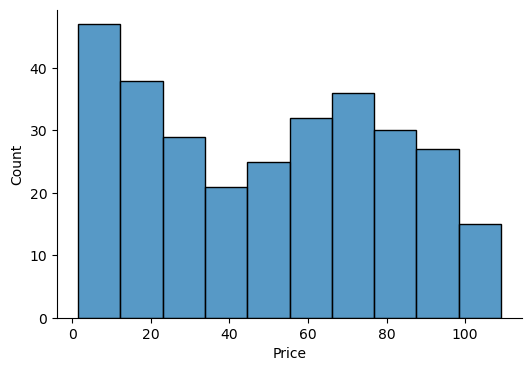

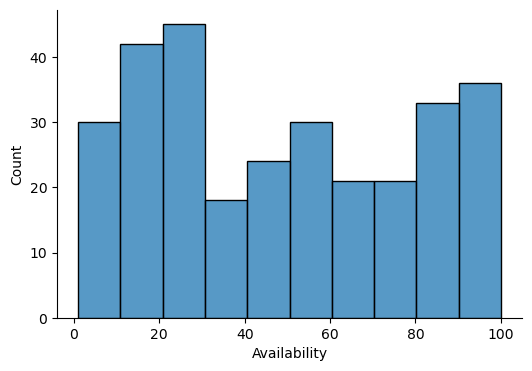

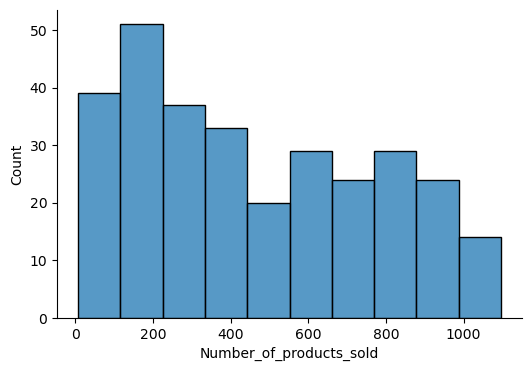

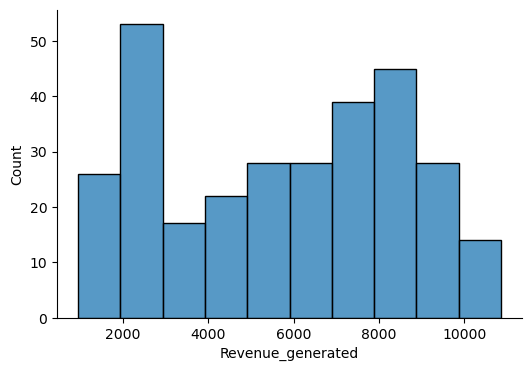

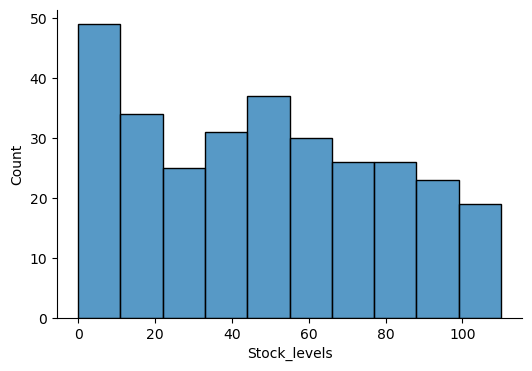

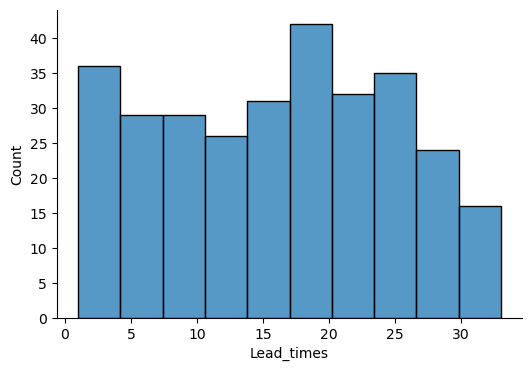

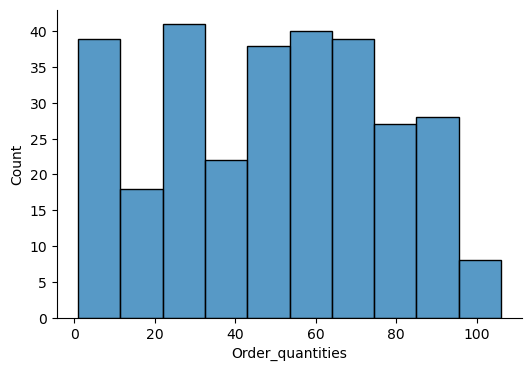

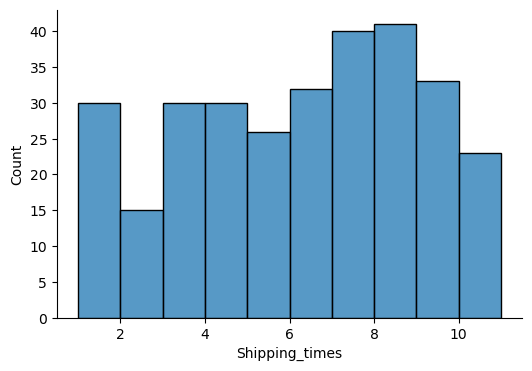

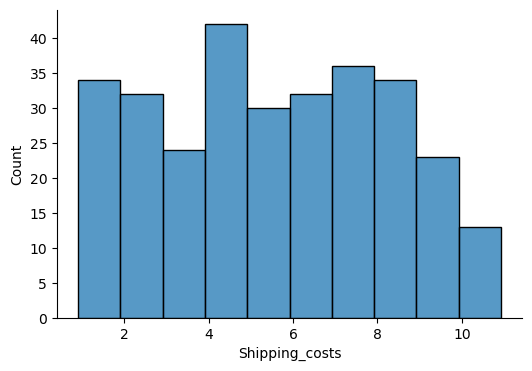

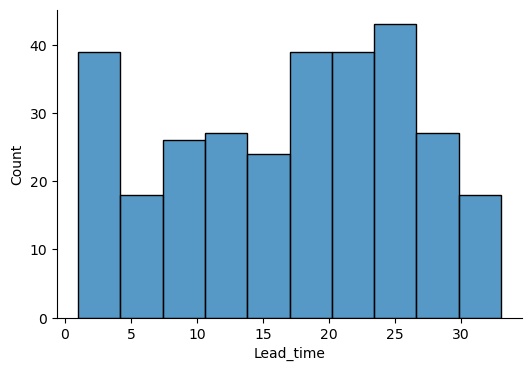

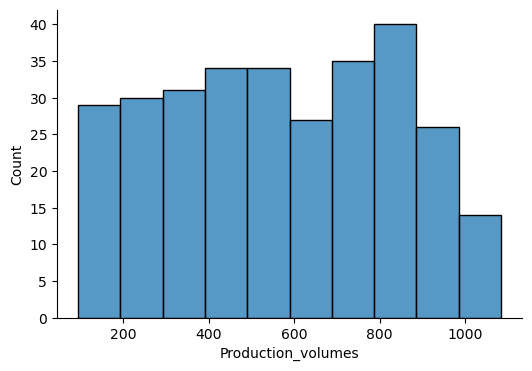

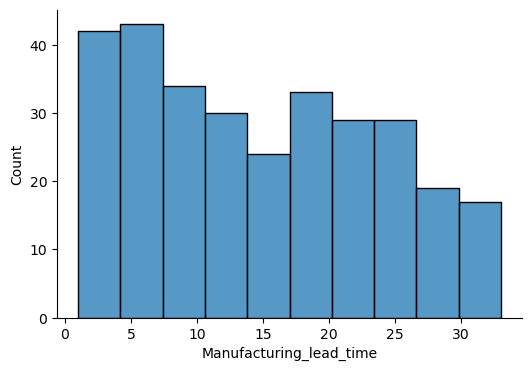

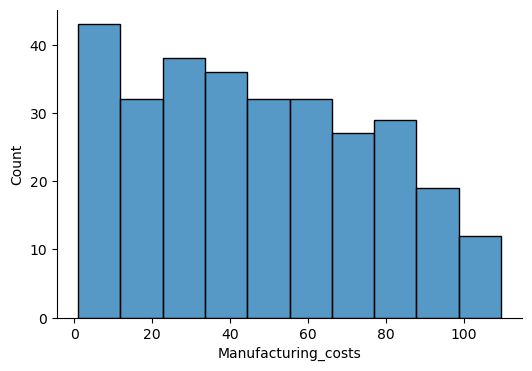

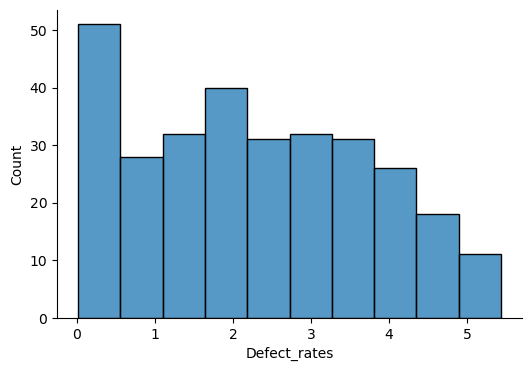

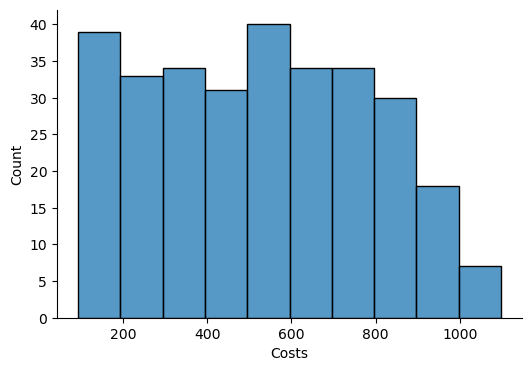

In [24]:
# посмотрим на распределения числовых переменных

for i in dependent_variables:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_num.loc[:, ~df_num.columns.isin(['Code_results'])], x=i)
    
    sns.despine()

Вывод:
- Распределение независимых вещественных переменных близко к равномерному.

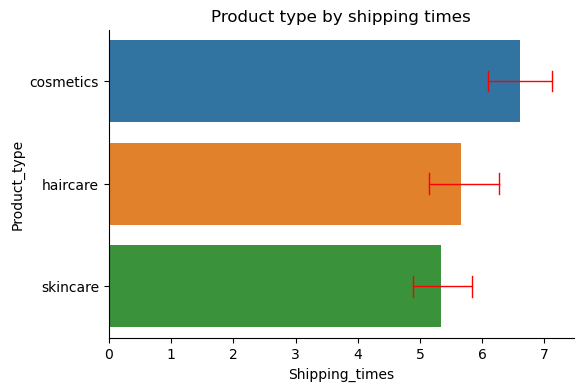

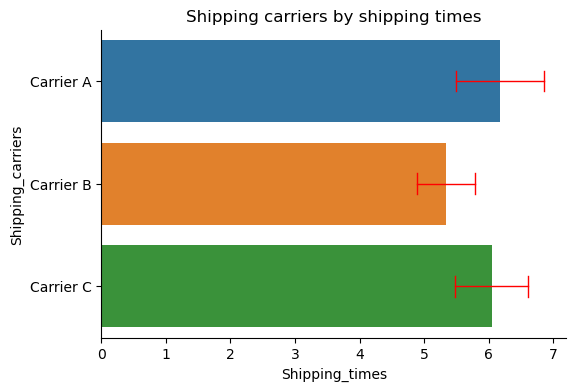

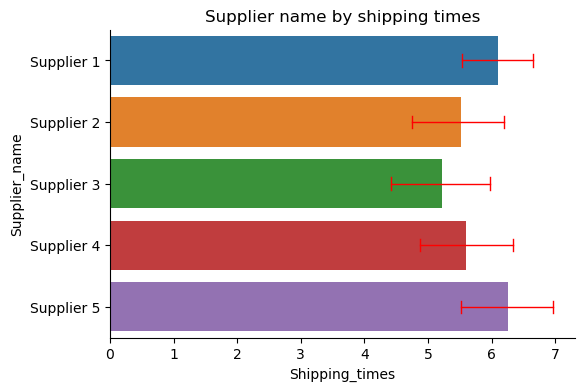

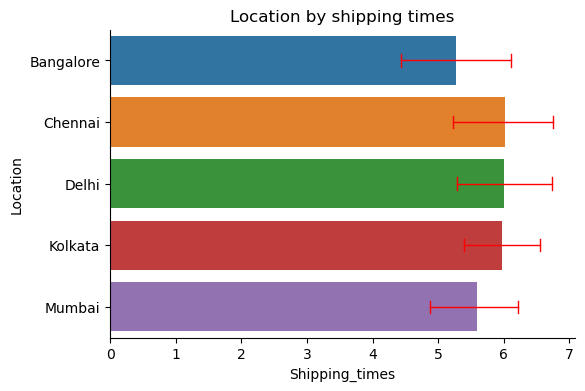

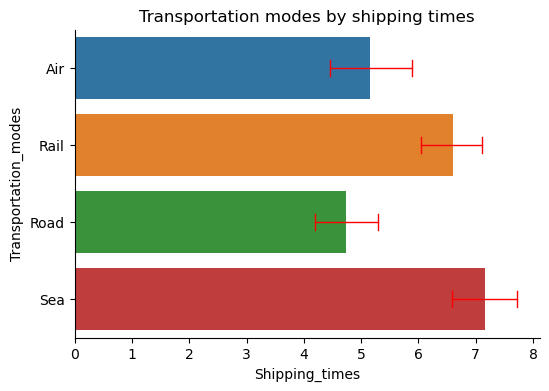

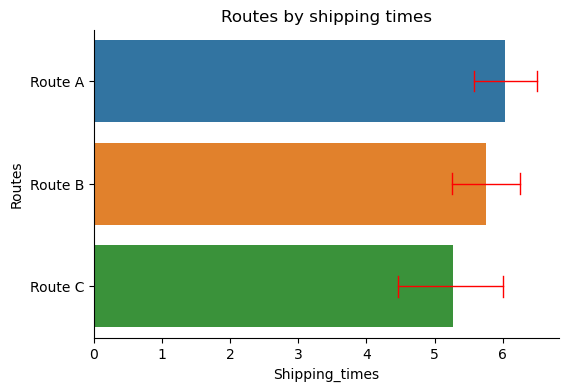

In [25]:
# влияние различных факторов на среднее время доставки
factors = ['Product_type', 'Shipping_carriers', 'Supplier_name', 'Location', 'Transportation_modes', 'Routes']
title = ['Product type by shipping times', 'Shipping carriers by shipping times', 'Supplier name by shipping times',
        'Location by shipping times', 'Transportation modes by shipping times', 'Routes by shipping times']

for i in range(len(factors)):
    plt.figure(figsize=(6, 4))
    sns.barplot(data=df, y=factors[i], x='Shipping_times',
                order=sorted(list(df[factors[i]].unique())),
                estimator='mean', errorbar=('ci', 95), capsize=.2,
                errwidth=1, errcolor='red')
    
    sns.despine()
    plt.title(title[i])
    plt.show()

Вывод:
- Стат. значимой разницы во времени доставки между cosmetics и haircare, между haircare и skincare не наблюдается. А вот между cosmetics и skincare она есть. Товары группы skincare доставляются быстрее.
- Стат. значимой разницы во времени доставки между курьерами не наблюдается.
- Стат. значимой разницы во времени доставки между поставщиками не наблюдается.
- Стат. значимой разницы во времени доставки между пунктами назначения не наблюдается.
- Стат. значимой разницы во времени доставки между способом доствки Air и Road, между Rail и Sea не наблюдается. Но способы доставки Air и Road стат. значимо лучше чем Rail и Sea. Получается всех быстрее доставлять либо по трассе, либо по воздуху.
- Route C показал среднее время доставки ниже, но стат. значимой разницы во времени доставки между маршрутами не наблюдается. Стоит собрать больше данных по маршруту C для получения более достоверных показателей.